In [2]:
import pandas as pd

In [3]:
history = pd.read_csv('data/submission_history.csv', sep=';')
history

,model,filename,validation,private_score,public_score,status,date,description
0,bag(xgb),bagging_xgb_best_params_polyfeat,0.902510,0.88470,0.88290,Complete (after deadline),2d ago,NaN
1,bag(xgb),bagging_xgb_polyfeat,0.901570,0.88613,0.88451,Complete (after deadline),2d ago,NaN
2,voting(rfc xgb hgb abc),voting(rfc xgb hgb abc),0.892540,0.87934,0.87970,Complete (after deadline),2d ago,NaN
3,bag(xgb),bagging_xgb_polyfeat_imp_pred_pdp_pca_embs,0.894680,0.88343,0.88094,Complete,2d ago,NaN
4,stack(xgb hgb abc),stack(xgb hgb abc)_polyfeat_imp_pred_pdppca_embs,0.894220,0.87878,0.88190,Complete,2d ago,NaN
5,bag(xgb),bagging_xgb_polyfeat_imp_pred_pdp_pca_embs_,0.896200,0.87918,0.88083,Complete,2d ago,NaN
6,stack(xgb hgb abc),stack_optimized(xgb hgb abc)_polyfeat_imp_pred...,0.890820,0.87321,0.87389,Complete,2d ago,NaN
7,stack(xgb hgb abc),stack(xgb hgb abc)_polyfeat_imp_pred_pdppca_embs,0.892210,0.87997,0.88044,Complete,3d ago,NaN
8,xgb,xgb_hp_polyfeat_imp_pred_pdp_pca_embs,0.893360,0.87044,0.87144,Complete,3d ago,NaN
9,xgb,xgb_randomized_search_full_polyfeat_imp_pred_p...,0.897400,0.88100,0.88227,Complete,3d ago,NaN


In [4]:
history["ensemble"] = history["model"].str.contains("\(")

In [5]:
history.shape[0]

28

In [6]:
# add order of submission, index

history["order"] = (-history.index + history.shape[0] - 1).to_list()

In [7]:
# Max by private score

history.loc[history["private_score"].idxmax()]

model            avg(stack(bag(xgb) xgb hgb abc)->logreg voting...
filename                                       average_classifier_
validation                                                     NaN
private_score                                              0.88963
public_score                                               0.88677
status                                                    Complete
date                                                       1mo ago
description      VotingClassifier( estimators=[ ("rfc", rfc), (...
ensemble                                                      True
order                                                            9
Name: 18, dtype: object

In [8]:
# Max by public score

history.loc[history["public_score"].idxmax()]

model            stack(xgb hgb abc)
filename         stack(xgb hgb abc)
validation                  0.89412
private_score               0.88681
public_score                0.88695
status                     Complete
date                        1mo ago
description                     NaN
ensemble                       True
order                            13
Name: 14, dtype: object

In [9]:
# Max by validation score

history.loc[history["validation"].idxmax()]

model                                    bag(xgb)
filename         bagging_xgb_best_params_polyfeat
validation                                0.90251
private_score                              0.8847
public_score                               0.8829
status                  Complete (after deadline)
date                                       2d ago
description                                   NaN
ensemble                                     True
order                                          27
Name: 0, dtype: object

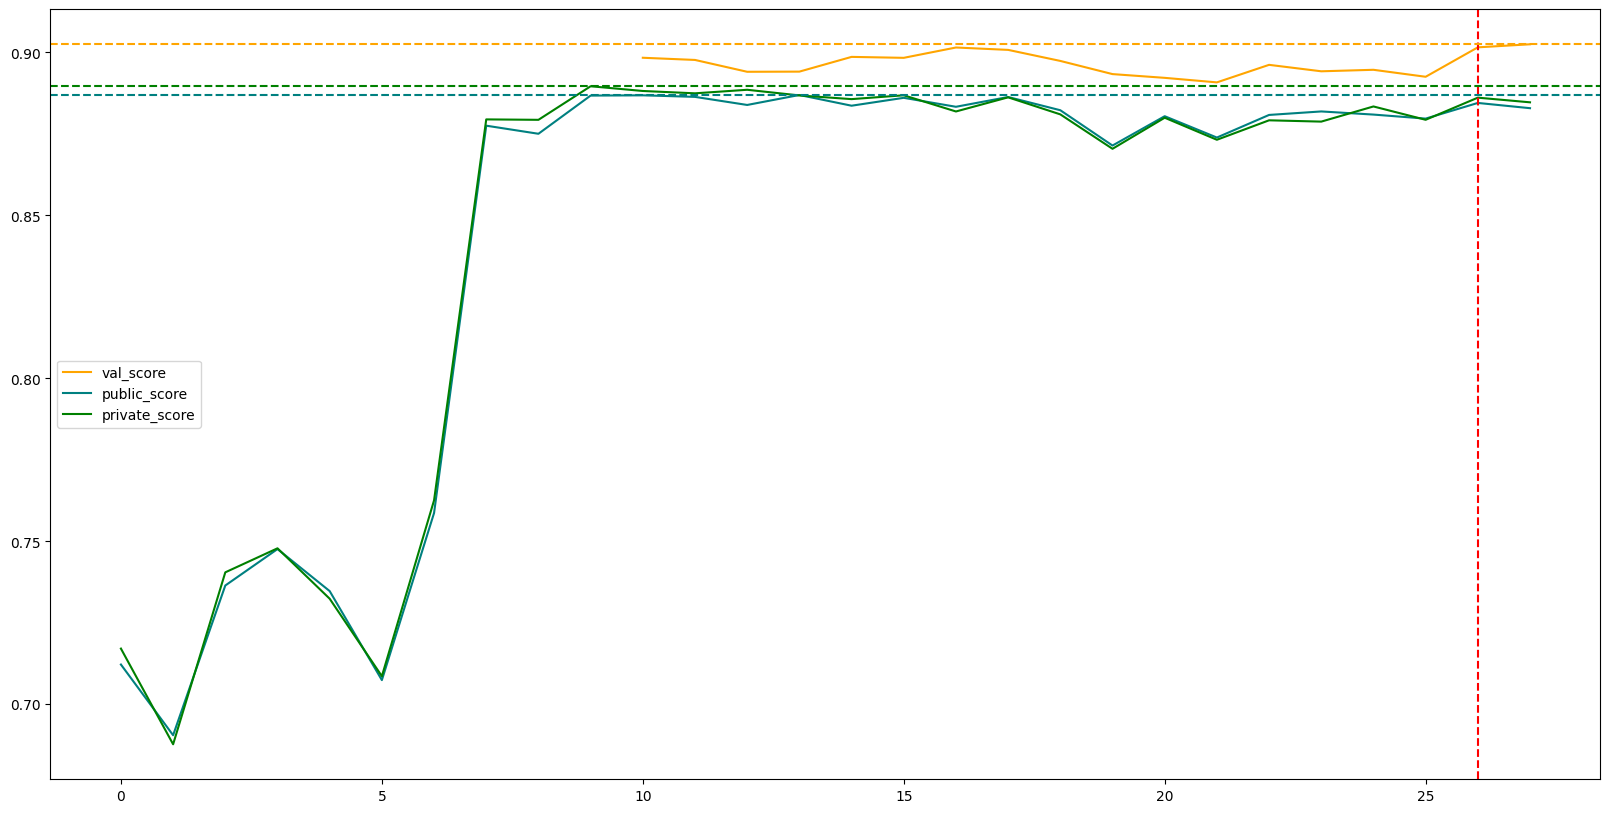

In [10]:
# Plot validation line vs public score line vs private score line

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(history["order"], history["validation"], label="val_score", color="orange")
ax.plot(history["order"], history["public_score"], label="public_score", color="teal")
ax.plot(history["order"], history["private_score"], label="private_score", color="green")

ax.legend()

# Add vertical line at (- history.index + 2)

ax.axvline(history.shape[0] - 2, color="red", linestyle="--")

# Add horizontal lines at max values

ax.axhline(history["validation"].max(), color="orange", linestyle="--")
ax.axhline(history["public_score"].max(), color="teal", linestyle="--")
ax.axhline(history["private_score"].max(), color="green", linestyle="--")

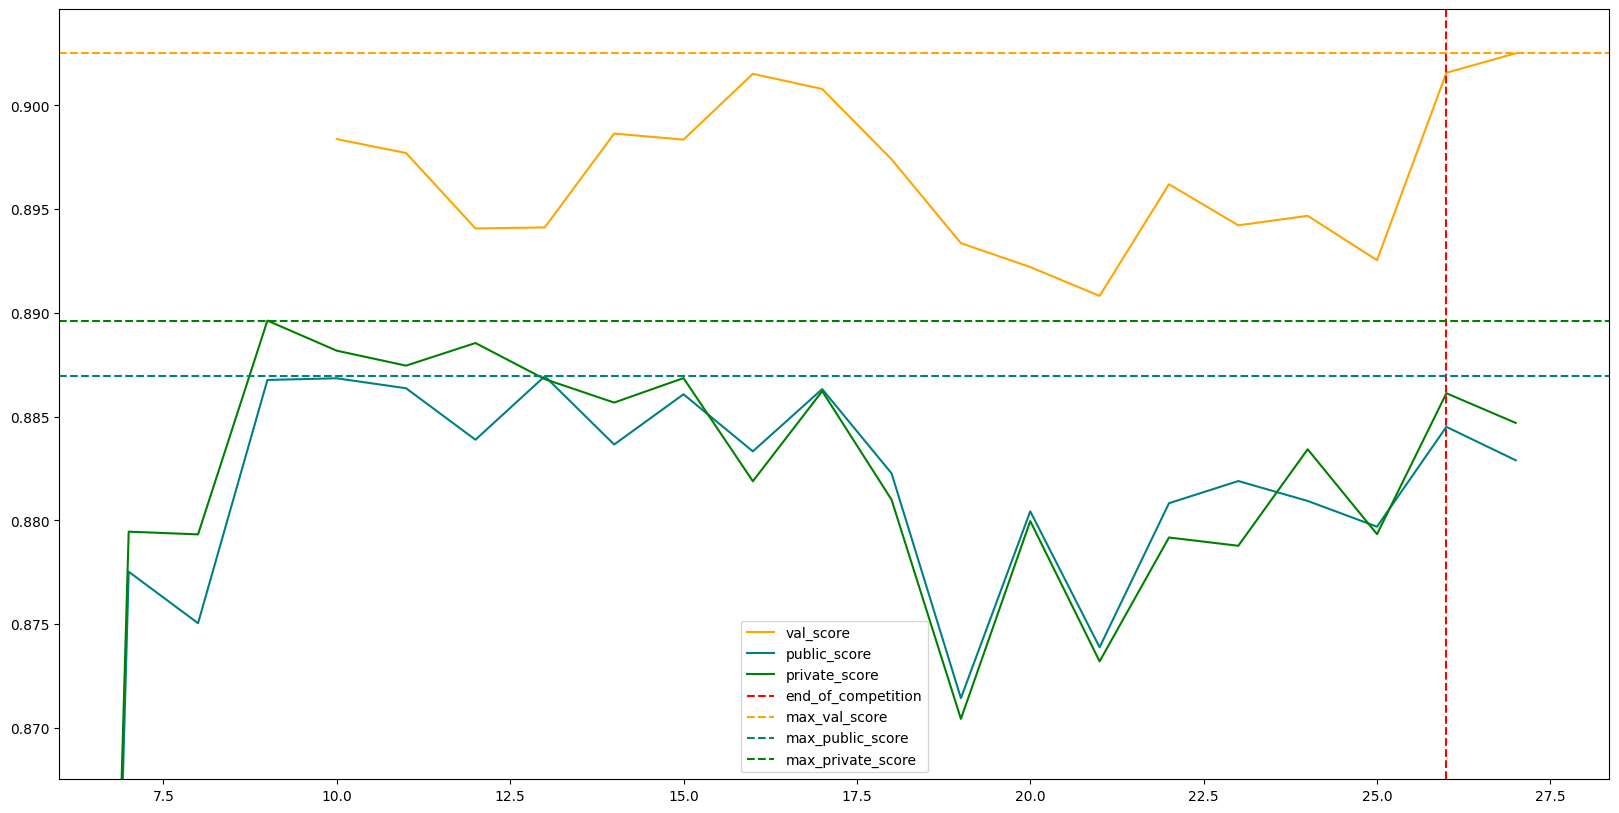

In [11]:
# Plot validation line vs public score line vs private score line

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(history["order"], history["validation"], label="val_score", color="orange")
ax.plot(history["order"], history["public_score"], label="public_score", color="teal")
ax.plot(history["order"], history["private_score"], label="private_score", color="green")

# Add vertical line at (- history.index + 2)

ax.axvline(history.shape[0] - 2, color="red", linestyle="--", label="end_of_competition")

# Add horizontal lines at max values

ax.axhline(history["validation"].max(), color="orange", linestyle="--", label="max_val_score")
ax.axhline(history["public_score"].max(), color="teal", linestyle="--", label="max_public_score")
ax.axhline(history["private_score"].max(), color="green", linestyle="--", label="max_private_score")

ax.set_xlim(6, ax.get_xlim()[1])
ax.set_ylim(history.loc[history["order"] == 7, "public_score"].values[0] - 0.01, max(history["public_score"].max() + 0.01, history["private_score"].max() + 0.015))

ax.legend()

In [12]:
# Max difference between public and private score

history["public_private_diff"] = history["public_score"] - history["private_score"]

history.loc[history["public_private_diff"].idxmax()]

model                                                stack(xgb hgb abc)
filename               stack(xgb hgb abc)_polyfeat_imp_pred_pdppca_embs
validation                                                      0.89422
private_score                                                   0.87878
public_score                                                     0.8819
status                                                         Complete
date                                                             2d ago
description                                                         NaN
ensemble                                                           True
order                                                                23
public_private_diff                                             0.00312
Name: 4, dtype: object

In [13]:
# Max difference between public and validation score

history["public_validation_diff"] = history["public_score"] - history["validation"]

history.loc[history["public_validation_diff"].idxmax()]

model                     stack(xgb hgb abc)
filename                  stack(xgb hgb abc)
validation                           0.89412
private_score                        0.88681
public_score                         0.88695
status                              Complete
date                                 1mo ago
description                              NaN
ensemble                                True
order                                     13
public_private_diff                  0.00014
public_validation_diff              -0.00717
Name: 14, dtype: object

In [14]:

results = pd.DataFrame(columns=["model", "public_score", "private_score", "validation", "order", "date"])

history_own = history[history["order"] > 0]

results = results.append(history.loc[history["public_score"].idxmax(), ["model", "public_score", "private_score", "validation", "order", "date"]])
results = results.append(history.loc[history["private_score"].idxmax(), ["model", "public_score", "private_score", "validation", "order", "date"]])
results = results.append(history.loc[history["validation"].idxmax(), ["model", "public_score", "private_score", "validation", "order", "date"]])
results = results.append(history.loc[history["public_private_diff"].idxmax(), ["model", "public_score", "private_score", "validation", "order", "date"]])
results = results.append(history.loc[history["public_validation_diff"].idxmax(), ["model", "public_score", "private_score", "validation", "order", "date"]])
results = results.append(history_own.loc[history_own["public_private_diff"].idxmin(), ["model", "public_score", "private_score", "validation", "order", "date"]])
results = results.append(history.loc[history["public_validation_diff"].idxmin(), ["model", "public_score", "private_score", "validation", "order", "date"]])

results

,model,public_score,private_score,validation,order,date
14,stack(xgb hgb abc),0.88695,0.88681,0.89412,13,1mo ago
18,avg(stack(bag(xgb) xgb hgb abc)->logreg voting...,0.88677,0.88963,NaN,9,1mo ago
0,bag(xgb),0.88290,0.88470,0.90251,27,2d ago
4,stack(xgb hgb abc),0.88190,0.87878,0.89422,23,2d ago
14,stack(xgb hgb abc),0.88695,0.88681,0.89412,13,1mo ago
15,voting(rfc xgb hgb abc),0.88389,0.88855,0.89407,12,1mo ago
8,xgb,0.87144,0.87044,0.89336,19,3d ago


In [15]:
history

,model,filename,validation,private_score,public_score,status,date,description,ensemble,order,public_private_diff,public_validation_diff
0,bag(xgb),bagging_xgb_best_params_polyfeat,0.902510,0.88470,0.88290,Complete (after deadline),2d ago,NaN,True,27,-0.00180,-0.019610
1,bag(xgb),bagging_xgb_polyfeat,0.901570,0.88613,0.88451,Complete (after deadline),2d ago,NaN,True,26,-0.00162,-0.017060
2,voting(rfc xgb hgb abc),voting(rfc xgb hgb abc),0.892540,0.87934,0.87970,Complete (after deadline),2d ago,NaN,True,25,0.00036,-0.012840
3,bag(xgb),bagging_xgb_polyfeat_imp_pred_pdp_pca_embs,0.894680,0.88343,0.88094,Complete,2d ago,NaN,True,24,-0.00249,-0.013740
4,stack(xgb hgb abc),stack(xgb hgb abc)_polyfeat_imp_pred_pdppca_embs,0.894220,0.87878,0.88190,Complete,2d ago,NaN,True,23,0.00312,-0.012320
5,bag(xgb),bagging_xgb_polyfeat_imp_pred_pdp_pca_embs_,0.896200,0.87918,0.88083,Complete,2d ago,NaN,True,22,0.00165,-0.015370
6,stack(xgb hgb abc),stack_optimized(xgb hgb abc)_polyfeat_imp_pred...,0.890820,0.87321,0.87389,Complete,2d ago,NaN,True,21,0.00068,-0.016930
7,stack(xgb hgb abc),stack(xgb hgb abc)_polyfeat_imp_pred_pdppca_embs,0.892210,0.87997,0.88044,Complete,3d ago,NaN,True,20,0.00047,-0.011770
8,xgb,xgb_hp_polyfeat_imp_pred_pdp_pca_embs,0.893360,0.87044,0.87144,Complete,3d ago,NaN,False,19,0.00100,-0.021920
9,xgb,xgb_randomized_search_full_polyfeat_imp_pred_p...,0.897400,0.88100,0.88227,Complete,3d ago,NaN,False,18,0.00127,-0.015130


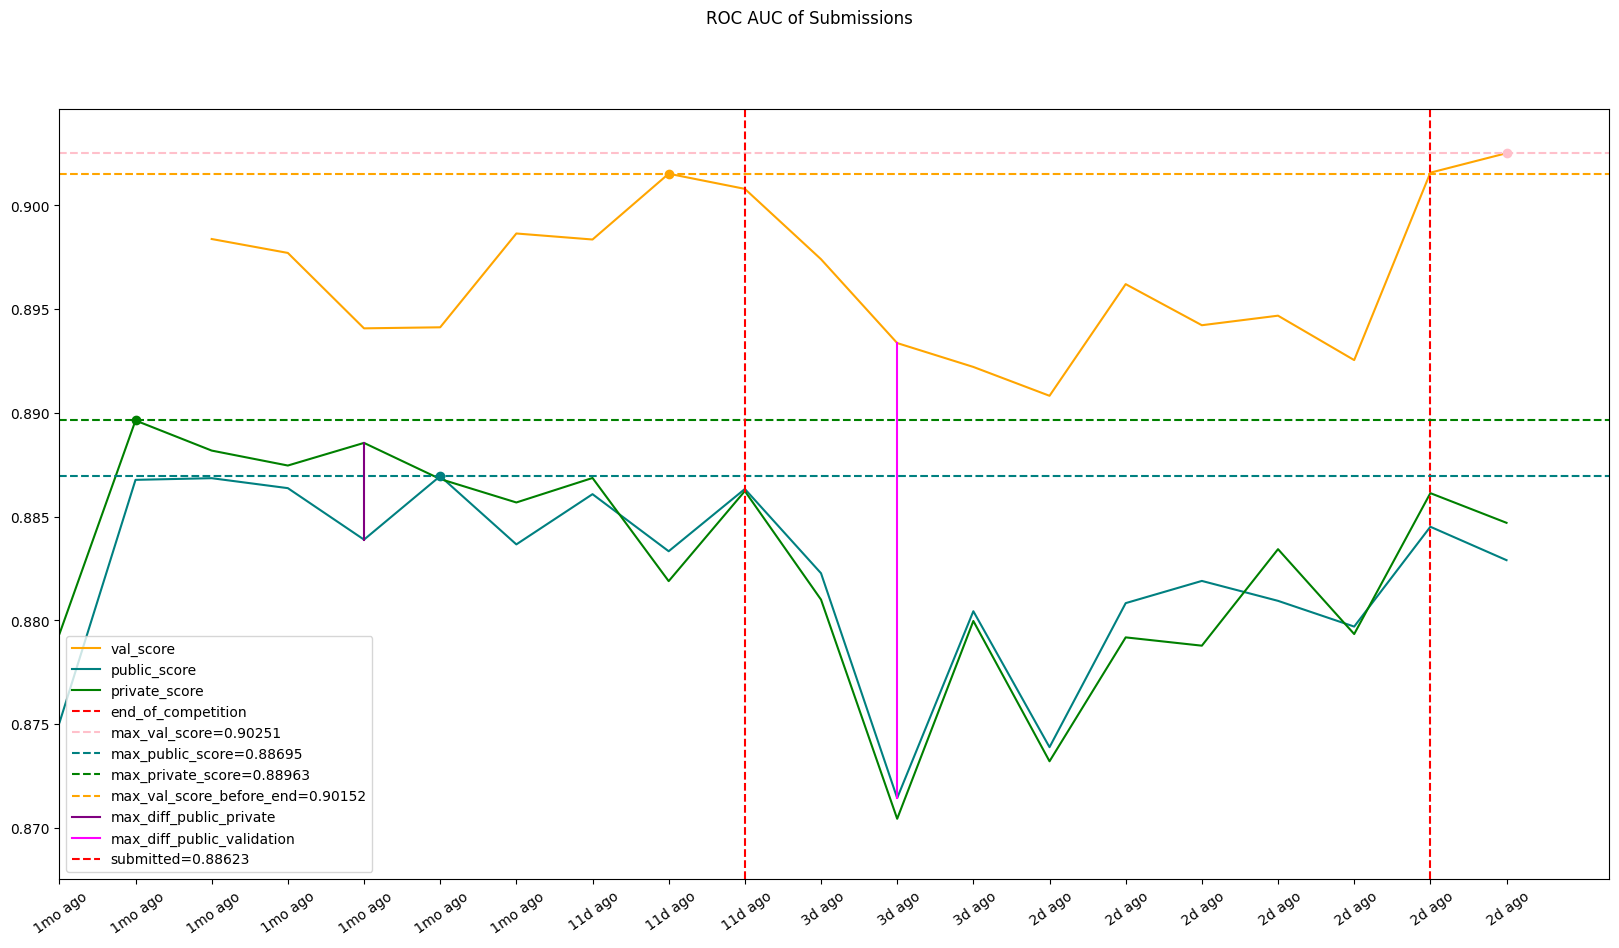

In [56]:
# Plot validation line vs public score line vs private score line

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(history["order"], history["validation"], label="val_score", color="orange")
ax.plot(history["order"], history["public_score"], label="public_score", color="teal")
ax.plot(history["order"], history["private_score"], label="private_score", color="green")

# Add vertical line at (- history.index + 2)

ax.axvline(history.shape[0] - 2, color="red", linestyle="--", label="end_of_competition")

# Add horizontal lines at max values

ax.axhline(history["validation"].max(), color="pink", linestyle="--", label=f"max_val_score={history['validation'].max()}")
ax.axhline(history["public_score"].max(), color="teal", linestyle="--", label=f"max_public_score={history['public_score'].max()}")
ax.axhline(history["private_score"].max(), color="green", linestyle="--", label=f"max_private_score={history['private_score'].max()}")

# Add max validation before end of competition

ax.axhline(history.loc[history[history["status"] != "Complete (after deadline)"]["validation"].idxmax()]["validation"], color="orange", linestyle="--", label=f"max_val_score_before_end={history.loc[history[history['status'] != 'Complete (after deadline)']['validation'].idxmax()]['validation']}")

# Plot distance in between max and min differences

ax.plot(history.loc[history["validation"].idxmax()]["order"], history["validation"].max(), marker="o", color="pink")
ax.plot(history.loc[history["public_score"].idxmax()]["order"], history["public_score"].max(), marker="o", color="teal")
ax.plot(history.loc[history["private_score"].idxmax()]["order"], history["private_score"].max(), marker="o", color="green")
ax.plot(history.loc[history[history["status"] != "Complete (after deadline)"]["validation"].idxmax()]["order"], history.loc[history[history["status"] != "Complete (after deadline)"]["validation"].idxmax()]["validation"], marker="o", color="orange")


# Max difference between public and private score
ax.plot(
    [history.loc[history[history["order"] > 7]["public_private_diff"].abs().idxmax()]["order"], history.loc[history[history["order"] > 7]["public_private_diff"].abs().idxmax()]["order"]],
    [history.loc[history[history["order"] > 7]["public_private_diff"].abs().idxmax()]["private_score"], history.loc[history[history["order"] > 7]["public_private_diff"].abs().idxmax()]["public_score"]],      
    color="purple",
    label=f"max_diff_public_private" # ={history.loc[history['public_private_diff'].idxmax()]['public_private_diff']}"
)

# Max difference between public and validation score
ax.plot(
    [history.loc[history["public_validation_diff"].abs().idxmax()]["order"], history.loc[history["public_validation_diff"].abs().idxmax()]["order"]],
    [history.loc[history["public_validation_diff"].abs().idxmax()]["validation"], history.loc[history["public_validation_diff"].abs().idxmax()]["public_score"]],      
    color="magenta",
    label=f"max_diff_public_validation" #{history.loc[history['public_validation_diff'].idxmax()]['public_validation_diff']}"
)


# Line at order 17 (final submission)
ax.axvline(17, color="red", linestyle="--", label=f"submitted={history[history['order'] == 17]['private_score'].values[0]}")

# Set date as xticks

ax.set_xticks(history["order"])
ax.set_xticklabels(history["date"], rotation=35)

ax.set_ylim(
    history.loc[history["order"] == 7, "public_score"].values[0] - 0.01, 
    max(
        history["public_score"].max() + 0.01, 
        history["private_score"].max() + 0.015
    )
)
ax.set_xlim(8, ax.get_xlim()[1])

ax.legend()

fig.suptitle("ROC AUC of Submissions")

fig.savefig("plots/submission_history.png")

In [21]:
history.dropna(subset=["validation"])["validation"].values

array([0.90251   , 0.90157   , 0.89254   , 0.89468   , 0.89422   ,
       0.8962    , 0.89082   , 0.89221   , 0.89336   , 0.8974    ,
       0.90079   , 0.90152   , 0.89835   , 0.89864   , 0.89412   ,
       0.89407   , 0.89770344, 0.89837396])